In [311]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [312]:
data=pd.read_csv('../artifact/sentiment-analysis-dataset/sentiment_analysis.csv')


In [313]:
data.head(5)

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [314]:
import re
import string

In [315]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [316]:
data.head(5)

,id,label,tweet
0,1,0,#fingerprint #pregnancy test https://goo.gl/h1...
1,2,0,finally a transparant silicon case ^^ thanks t...
2,3,0,we love this! would you go? #talk #makememorie...
3,4,0,i'm wired i know i'm george i was made that wa...
4,5,1,what amazing service! apple won't even talk to...


In [317]:
data["tweet"] = data['tweet'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))

In [318]:
data.head(5)

,id,label,tweet
0,1,0,#fingerprint #pregnancy test #android #apps #...
1,2,0,finally a transparant silicon case ^^ thanks t...
2,3,0,we love this! would you go? #talk #makememorie...
3,4,0,i'm wired i know i'm george i was made that wa...
4,5,1,what amazing service! apple won't even talk to...


In [319]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [320]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data["tweet"] = data["tweet"].apply(remove_punctuations)

In [321]:
data["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely 90 year old neighbor with he...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

In [322]:
data["tweet"] = data['tweet'].str.replace('\d+', '', regex=True)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\User\AppData\Local\Temp\ipykernel_13452\425538495.py:1: SyntaxWarning: invalid escape sequence '\d'
  data["tweet"] = data['tweet'].str.replace('\d+', '', regex=True)


In [323]:
data["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

In [324]:
import nltk

In [325]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()

In [326]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [327]:
data["tweet"].head()

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
Name: tweet, dtype: object

In [328]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [329]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [330]:
data["tweet"].head()

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

In [331]:
from collections import Counter
vocab=Counter()

In [332]:
for sentence in data['tweet']:
  vocab.update(sentence.split())

In [333]:
len(vocab)

15949

In [334]:
tokens=[key for key in vocab if vocab[key]>100]

In [335]:
len(tokens)

126

In [336]:
def save_vocabulary(lines,filename):
    data='\n'.join(lines)
    file=open(filename,'w',encoding="utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens,'../static/model/vocabulary.txt')

In [337]:
x=data['tweet']
y=data['label']

In [338]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [339]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [340]:
x_train.shape

(6336,)

In [341]:
x_test.shape

(1584,)

In [342]:
def vectorized(ds, vocabulary):
    vectorized_lst = []

    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))

        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1

        vectorized_lst.append(sentence_lst)

    vectorized_lst_new = np.array(vectorized_lst, dtype=np.float32)
    return vectorized_lst_new

In [343]:
vectorized_x_train=vectorized(x_train,tokens)

In [344]:
vectorized_x_test=vectorized(x_test,tokens)

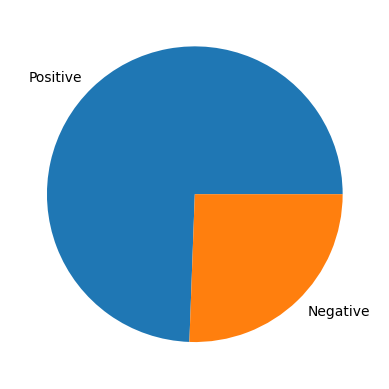

In [345]:
plt.pie(np.array([y_train.value_counts()[0],y_train.value_counts()[1]]),labels=['Positive','Negative'])
plt.show()

In [346]:
#This y train values are not balance.So first we do to balance y_train

In [347]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


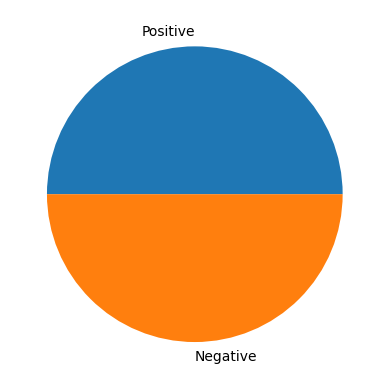

In [348]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
vectorized_x_train_smote,y_train_smote=smote.fit_resample(vectorized_x_train,y_train)
plt.pie(np.array([y_train_smote.value_counts()[0],y_train_smote.value_counts()[1]]),labels=['Positive','Negative'])
plt.show()

In [349]:
from  sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [350]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')
    
def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

# Logistic Regression


In [351]:
lr=LogisticRegression()
lr.fit(vectorized_x_train_smote,y_train_smote)
y_train_pred=lr.predict(vectorized_x_train_smote)
training_scores(y_train_smote,y_train_pred)
y_test_pred=lr.predict(vectorized_x_test)
validation_scores(y_test,y_test_pred)

Training Scores:
	Accuracy = 0.86
	Precision = 0.832
	Recall = 0.902
	F1-Score = 0.865
Testing Scores:
	Accuracy = 0.855
	Precision = 0.663
	Recall = 0.879
	F1-Score = 0.756


# MultinomialNB

In [352]:
mn=MultinomialNB()
mn.fit(vectorized_x_train_smote,y_train_smote)
y_train_pred=mn.predict(vectorized_x_train_smote)
training_scores(y_train_smote,y_train_pred)
y_test_pred=mn.predict(vectorized_x_test)
validation_scores(y_test,y_test_pred)

Training Scores:
	Accuracy = 0.848
	Precision = 0.826
	Recall = 0.881
	F1-Score = 0.853
Testing Scores:
	Accuracy = 0.838
	Precision = 0.636
	Recall = 0.859
	F1-Score = 0.731


# RandomForestClassifier

In [353]:
rc=RandomForestClassifier()
rc.fit(vectorized_x_train_smote,y_train_smote)
y_train_pred=rc.predict(vectorized_x_train_smote)
training_scores(y_train_smote,y_train_pred)
y_test_pred=rc.predict(vectorized_x_test)
validation_scores(y_test,y_test_pred)

Training Scores:
	Accuracy = 0.967
	Precision = 0.958
	Recall = 0.978
	F1-Score = 0.968
Testing Scores:
	Accuracy = 0.858
	Precision = 0.708
	Recall = 0.756
	F1-Score = 0.731


# SVC

In [354]:
sc=SVC()
sc.fit(vectorized_x_train_smote,y_train_smote)
y_train_pred=sc.predict(vectorized_x_train_smote)
training_scores(y_train_smote,y_train_pred)
y_test_pred=sc.predict(vectorized_x_test)
validation_scores(y_test,y_test_pred)

Training Scores:
	Accuracy = 0.915
	Precision = 0.89
	Recall = 0.949
	F1-Score = 0.918
Testing Scores:
	Accuracy = 0.86
	Precision = 0.684
	Recall = 0.844
	F1-Score = 0.756


# DecisionTreeClassifier

In [355]:
dtc=DecisionTreeClassifier()
dtc.fit(vectorized_x_train_smote,y_train_smote)
y_train_pred=dtc.predict(vectorized_x_train_smote)
training_scores(y_train_smote,y_train_pred)
y_test_pred=dtc.predict(vectorized_x_test)
validation_scores(y_test,y_test_pred)

Training Scores:
	Accuracy = 0.967
	Precision = 0.965
	Recall = 0.97
	F1-Score = 0.967
Testing Scores:
	Accuracy = 0.804
	Precision = 0.612
	Recall = 0.64
	F1-Score = 0.626


In [356]:
import pickle
with open('../static/model/model.pickle','wb') as file:
    pickle.dump(lr,file)